## Plot interactions and embeddings

In [57]:
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd

In [58]:


def bar_plot(data, title='Performance for observation', resource_name='test.png', legend=['Random Forest', 'Logistic Regression']):
    plt.style.use('ggplot')
    # fig, ax = plt.subplots(nrows=1, ncols=1)
    fig, axs = plt.subplots(1, 2)
    fig.suptitle(title)
    data[0].plot(kind='bar', ax=axs[0])
    data[1].plot(kind='bar', ax=axs[1])

    indices = range(data[0].shape[0])
    labels = data[0][0].to_list()

    for ax in axs.flat:
        ax.set(ylabel='balanced accuracy')
        ax.set_ylim([0.4,1])
        ax.grid(color='lightgray', linestyle='--', linewidth=1)
        ax.set_facecolor('w')
        ax.get_legend().remove()
        ax.axhline(y = 0.5, color = 'dimgrey', linestyle = '--', linewidth=1)

    axs[0].set_title('Gender inference', fontsize=10)
    axs[1].set_title('Age inference', fontsize=10)


    handles, _ = axs.flat[1].get_legend_handles_labels()
    print(handles)

    fig.legend(handles = handles, labels = legend, loc='lower center', fontsize=10, bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=False, ncol=len(legend), facecolor='white', edgecolor='white')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    plt.setp(axs, xticks=indices, xticklabels=labels)

    plt.gca().set_facecolor('w')
    fig.patch.set_facecolor('w')
    fig.tight_layout()
    plt.savefig('paper_plot_fig/'+ resource_name, bbox_inches='tight')


phases = ['interaction', 'embedding']

def load_and_plot(step):
    # age
    age_rf = pd.read_csv('paper_plot_sample/' + step + 's/age_inference_random-forest.csv', header=None)
    age_lr = pd.read_csv('paper_plot_sample/' + step + 's/age_inference_logistic-regression.csv', header=None)

    #gender
    gender_rf = pd.read_csv('paper_plot_sample/' + step + 's/gender_inference_random-forest.csv', header=None)
    gender_lr = pd.read_csv('paper_plot_sample/' + step + 's/gender_inference_logistic-regression.csv', header=None)

    age_df = age_rf.merge(age_lr, on=0)
    age_df.rename(columns={'1_x': 'Random Forest', '1_y': 'Logistic Regression'}, inplace=True)
    gender_df = gender_rf.merge(gender_lr, on=0)
    gender_df.rename(columns={'1_x': 'Random Forest', '1_y': 'Logistic Regression'}, inplace=True)

    bar_plot([gender_df, age_df], title=str(str.upper(step[0]) + step[1:] + 's level'), resource_name=str(step + 's.png'))


[<BarContainer object of 4 artists>, <BarContainer object of 4 artists>]
[<BarContainer object of 5 artists>, <BarContainer object of 5 artists>]


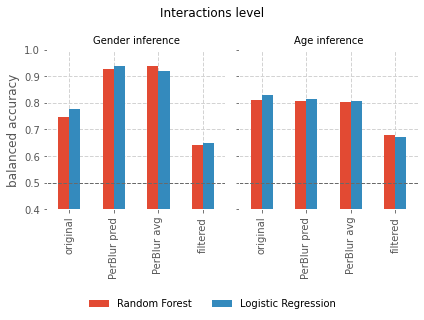

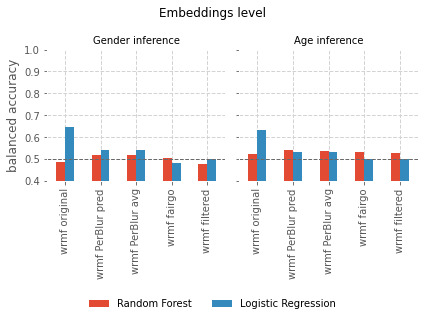

In [59]:
for p in phases:
    load_and_plot(p)

## Plot relevances and recs

In [60]:
def load(step, model, label, on_recs=False, recs_cutoff=10):
    dff = pd.read_csv('paper_plot_sample/' + step + 's/'+ model + '_' + label + '.csv', header=None)
    if not on_recs:
        return dff
    else:
        if recs_cutoff == 10:
            return dff[[0, 1]]
        elif recs_cutoff == 20:
            return dff[[0, 2]]
        return dff[[0, 3]]

labels = ['age', 'gender']
models = ['user-knn', 'bprmf', 'wrmf', 'multidae']

In [61]:
from functools import reduce

gender_relevances = [load('relevance', model, labels[1]) for model in models]
gender_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_relevances)
gender_relevances_final

/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_1567/559606244.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  gender_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_relevances)


,0,1_x,1_y,1_x,1_y
0,original,0.611291,0.662885,0.500000,0.698860
1,PerBlur pred,0.640516,0.802061,0.666973,0.749482
2,PerBlur avg,0.662945,0.802061,0.666973,0.749482
3,fairgo,0.000000,0.651188,0.543807,0.000000
4,filtered,0.573648,0.544141,0.500000,0.586180


In [62]:
age_relevances = [load('relevance', model, labels[0]) for model in models]
age_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), age_relevances)
age_relevances_final

/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_1567/3846226106.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  age_relevances_final = reduce(lambda left,right: pd.merge(left,right,on=0), age_relevances)


,0,1_x,1_y,1_x,1_y
0,original,0.659120,0.660101,0.614365,0.724553
1,PerBlur pred,0.642628,0.672970,0.600583,0.690190
2,PerBlur avg,0.631061,0.672970,0.600583,0.690190
3,fairgo,0.000000,0.657624,0.562704,0.000000
4,filtered,0.578073,0.525803,0.500000,0.603337


[<BarContainer object of 5 artists>, <BarContainer object of 5 artists>, <BarContainer object of 5 artists>, <BarContainer object of 5 artists>]


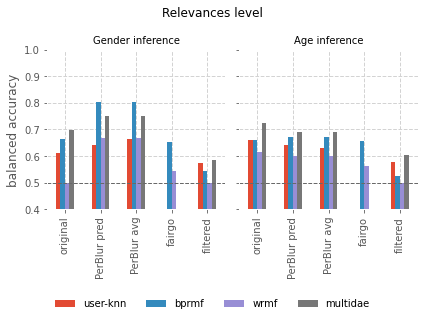

In [63]:
bar_plot([gender_relevances_final, age_relevances_final], title='Relevances level', resource_name=str('relevances.png'), legend=models)

/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_1567/1850331796.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  gender_recs_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_recs)
/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_1567/1850331796.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  age_recs_final = reduce(lambda left,right: pd.merge(left,right,on=0), age_recs)
/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipykernel_1567/1850331796.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2_x'} in the result is deprecated and will raise a MergeError in a future version.
  gender_recs_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_recs)
/var/folders/0r/m1t8hv6s7l9bsyqckwntb9qm0000gn/T/ipy

[<BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>]
[<BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>]
[<BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>]


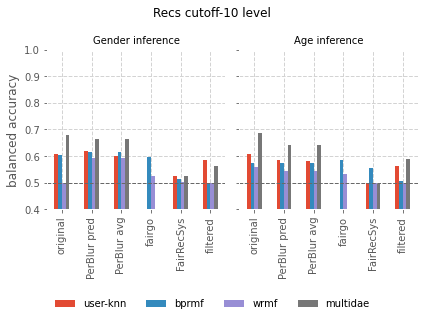

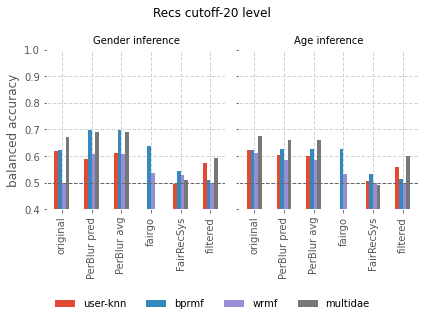

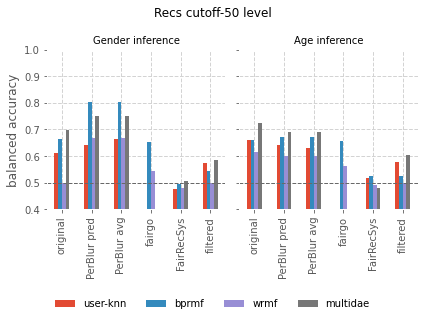

In [64]:
for c in [10, 20, 50]:
    gender_recs = [load('rec', model, labels[1], on_recs=True, recs_cutoff=c) for model in models]
    gender_recs_final = reduce(lambda left,right: pd.merge(left,right,on=0), gender_recs)
    age_recs = [load('rec', model, labels[0], on_recs=True, recs_cutoff=c) for model in models]
    age_recs_final = reduce(lambda left,right: pd.merge(left,right,on=0), age_recs)
    bar_plot([gender_recs_final, age_recs_final], title='Recs cutoff-'+ str(c) + ' level', resource_name=str('recs_'+ str(c) + '.png'), legend=models)